In [680]:
import numpy as np
import pandas as pd

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [681]:
df = pd.read_csv('Leads.csv')

In [682]:
df.head()

Prospect ID  Lead Number              Lead Origin     Lead Source Do Not Email Do Not Call  Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit            Last Activity Country           Specialization How did you hear about X Education What is your current occupation What matters most to you in choosing a course Search Magazine Newspaper Article X Education Forums Newspaper Digital Advertisement Through Recommendations Receive More Updates About Our Courses                                 Tags      Lead Quality Update me on Supply Chain Content Get updates on DM Content    Lead Profile    City Asymmetrique Activity Index Asymmetrique Profile Index  Asymmetrique Activity Score  Asymmetrique Profile Score I agree to pay the amount through cheque A free copy of Mastering The Interview Last Notable Activity
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API      Olark Chat           No          No          0          0.0                            0                   0.0  Page Visited on Website     NaN                   Select                             Select                      Unemployed                       Better Career Prospects     No       No                No                 No        No                    No                      No                                     No          Interested in other courses  Low in Relevance                                No                        No          Select  Select                   02.Medium                  02.Medium                         15.0                        15.0                                       No                                     No              Modified
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API  Organic Search           No          No          0          5.0                          674                   2.5             Email Opened   India                   Select                             Select                      Unemployed                       Better Career Prospects     No       No                No                 No        No                    No                      No                                     No                              Ringing               NaN                                No                        No          Select  Select                   02.Medium                  02.Medium                         15.0                        15.0                                       No                                     No          Email Opened
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission  Direct Traffic           No          No          1          2.0                         1532                   2.0             Email Opened   India  Business Administration                             Select                         Student                       Better Career Prospects     No       No                No                 No        No                    No                      No                                     No  Will revert after reading the email          Might be                                No                        No  Potential Lead  Mumbai                   02.Medium                    01.High                         14.0                        20.0                                       No                                    Yes          Email Opened
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission  Direct Traffic           No          No          0          1.0                          305                   1.0              Unreachable   India    Media and Advertising                      Word Of Mouth                      Unemployed                       Better Career Prospects     No       No                No                 No        No                    No                      No                                     No                              Ringing          Not S

In [683]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [684]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [685]:
df.shape


(9240, 37)

In [686]:
df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  Asymmetrique Activity Score  Asymmetrique Profile Score
count    9240.000000  9240.000000  9103.000000                  9240.000000           9103.000000                  5022.000000                 5022.000000
mean   617188.435606     0.385390     3.445238                   487.698268              2.362820                    14.306252                   16.344883
std     23405.995698     0.486714     4.854853                   548.021466              2.161418                     1.386694                    1.811395
min    579533.000000     0.000000     0.000000                     0.000000              0.000000                     7.000000                   11.000000
25%    596484.500000     0.000000     1.000000                    12.000000              1.000000                    14.000000                   15.000000
50%    615479.000000     0.000000     3.000000                   248.000000              2.000000                    14.000000                   16.000000
75%    637387.250000     1.000000     5.000000                   936.000000              3.000000                    15.000000                   18.000000
max    660737.000000     1.000000   251.000000                  2272.000000             55.000000                    18.000000                   20.000000

In [687]:
df[df.isnull().sum(axis = 1)>10]

Prospect ID  Lead Number Lead Origin     Lead Source Do Not Email Do Not Call  Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit            Last Activity Country Specialization How did you hear about X Education What is your current occupation What matters most to you in choosing a course Search Magazine Newspaper Article X Education Forums Newspaper Digital Advertisement Through Recommendations Receive More Updates About Our Courses                         Tags Lead Quality Update me on Supply Chain Content Get updates on DM Content Lead Profile City Asymmetrique Activity Index Asymmetrique Profile Index  Asymmetrique Activity Score  Asymmetrique Profile Score I agree to pay the amount through cheque A free copy of Mastering The Interview    Last Notable Activity
680   d1cebc5e-47b1-40cd-b5d1-d8924bc23ee0       653547         API      Olark Chat           No          No          0          NaN                          177                   NaN  Olark Chat Conversation     NaN            NaN                                NaN                             NaN                                           NaN     No       No                No                 No        No                    No                      No                                     No                          NaN          NaN                                No                        No          NaN  NaN                     01.High                  02.Medium                         17.0                        15.0                                       No                                     No                 Modified
963   59718980-d656-4415-baeb-c223ed6abe3a       649981         API  Organic Search           No          No          0         11.0                         1166                  2.20  Page Visited on Website   India            NaN                                NaN                             NaN                                           NaN     No       No                No                 No        No                    No                      No                                     No                          NaN          NaN                                No                        No          NaN  NaN                         NaN                        NaN                          NaN                         NaN                                       No                                     No  Page Visited on Website
1363  a8a1c41c-a21e-43bb-9120-444d79efff06       645610         API  Direct Traffic           No          No          0          4.0                          446                  1.33             Email Opened   India            NaN                                NaN                             NaN                                           NaN     No       No                No                 No        No                    No                      No                                     No                          NaN          NaN                                No                        No          NaN  NaN                         NaN                        NaN                          NaN                         NaN                                       No                                     No             Email Opened
1513  14f31910-89a3-4f38-b803-dbb57999ae44       644225         API          Google           No          No          0          6.0                          481                  6.00             Email Opened   India            NaN                                NaN                             NaN                                           NaN     No       No                No                 No        No                    No                      No                                     No  Interested in other courses          NaN                                No                        No          NaN  NaN                         NaN                        NaN                          NaN               

In [688]:
for i in df.columns:
    print(df[i].value_counts())

2d9a1b63-2cc7-48c4-8ab2-03a96716c2fa    1
6836d63b-3b70-4960-9ee6-825eaaec46f5    1
029effee-3a4a-4723-b11d-69ef1092fe30    1
5df2711c-0bb6-4776-b376-870acf509b63    1
3e8f18de-294c-4765-8ac5-b3035299fb07    1
                                       ..
826b7bdb-46ab-47e9-a875-fc7e2b9f898c    1
6b57ae95-e5ef-49cd-baab-d7ae022c23aa    1
145cf904-e36f-42ac-bf83-0c00433be3f9    1
e1aac2d6-a6c3-4b67-ae6a-818f7a177b46    1
da174428-c274-484c-a369-e3f6ebd48daa    1
Name: Prospect ID, Length: 9240, dtype: int64
608255    1
596233    1
656682    1
592824    1
652580    1
         ..
631489    1
600768    1
598556    1
616923    1
655360    1
Name: Lead Number, Length: 9240, dtype: int64
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference         

In [689]:
#Dropping these columns as all the column values are almost same

df = df.drop('Update me on Supply Chain Content',axis = 1)
df = df.drop('Get updates on DM Content',axis = 1)
df = df.drop('I agree to pay the amount through cheque',axis = 1)
df = df.drop('Magazine',axis = 1)
df = df.drop('Newspaper Article',axis = 1)
df = df.drop('X Education Forums',axis = 1)
df = df.drop('Digital Advertisement',axis = 1)
df = df.drop('Through Recommendations',axis = 1)
df = df.drop('Receive More Updates About Our Courses',axis = 1)
df = df.drop('Search',axis = 1)
df = df.drop('Newspaper',axis = 1)
df= df.drop('What matters most to you in choosing a course',axis = 1)
df = df.drop('Do Not Call',axis = 1)

In [690]:
df_using = df
df_using = df_using.drop('Lead Number',axis = 1)

In [691]:
df_using.head()

Prospect ID              Lead Origin     Lead Source Do Not Email  Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit            Last Activity Country           Specialization How did you hear about X Education What is your current occupation                                 Tags      Lead Quality    Lead Profile    City Asymmetrique Activity Index Asymmetrique Profile Index  Asymmetrique Activity Score  Asymmetrique Profile Score A free copy of Mastering The Interview Last Notable Activity
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620                      API      Olark Chat           No          0          0.0                            0                   0.0  Page Visited on Website     NaN                   Select                             Select                      Unemployed          Interested in other courses  Low in Relevance          Select  Select                   02.Medium                  02.Medium                         15.0                        15.0                                     No              Modified
1  2a272436-5132-4136-86fa-dcc88c88f482                      API  Organic Search           No          0          5.0                          674                   2.5             Email Opened   India                   Select                             Select                      Unemployed                              Ringing               NaN          Select  Select                   02.Medium                  02.Medium                         15.0                        15.0                                     No          Email Opened
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a  Landing Page Submission  Direct Traffic           No          1          2.0                         1532                   2.0             Email Opened   India  Business Administration                             Select                         Student  Will revert after reading the email          Might be  Potential Lead  Mumbai                   02.Medium                    01.High                         14.0                        20.0                                    Yes          Email Opened
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc  Landing Page Submission  Direct Traffic           No          0          1.0                          305                   1.0              Unreachable   India    Media and Advertising                      Word Of Mouth                      Unemployed                              Ringing          Not Sure          Select  Mumbai                   02.Medium                    01.High                         13.0                        17.0                                     No              Modified
4  3256f628-e534-4826-9d63-4a8b88782852  Landing Page Submission          Google           No          1          2.0                         1428                   1.0        Converted to Lead   India                   Select                              Other                      Unemployed  Will revert after reading the email          Might be          Select  Mumbai                   02.Medium                    01.High                         15.0                        18.0                                     No              Modified

In [692]:
for i in df_using.columns:
    print(df_using[i].value_counts())

2d9a1b63-2cc7-48c4-8ab2-03a96716c2fa    1
6836d63b-3b70-4960-9ee6-825eaaec46f5    1
029effee-3a4a-4723-b11d-69ef1092fe30    1
5df2711c-0bb6-4776-b376-870acf509b63    1
3e8f18de-294c-4765-8ac5-b3035299fb07    1
                                       ..
826b7bdb-46ab-47e9-a875-fc7e2b9f898c    1
6b57ae95-e5ef-49cd-baab-d7ae022c23aa    1
145cf904-e36f-42ac-bf83-0c00433be3f9    1
e1aac2d6-a6c3-4b67-ae6a-818f7a177b46    1
da174428-c274-484c-a369-e3f6ebd48daa    1
Name: Prospect ID, Length: 9240, dtype: int64
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat     

In [693]:
df

Prospect ID  Lead Number              Lead Origin     Lead Source Do Not Email  Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit            Last Activity       Country             Specialization How did you hear about X Education What is your current occupation                                 Tags       Lead Quality    Lead Profile                City Asymmetrique Activity Index Asymmetrique Profile Index  Asymmetrique Activity Score  Asymmetrique Profile Score A free copy of Mastering The Interview Last Notable Activity
0     7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API      Olark Chat           No          0          0.0                            0                  0.00  Page Visited on Website           NaN                     Select                             Select                      Unemployed          Interested in other courses   Low in Relevance          Select              Select                   02.Medium                  02.Medium                         15.0                        15.0                                     No              Modified
1     2a272436-5132-4136-86fa-dcc88c88f482       660728                      API  Organic Search           No          0          5.0                          674                  2.50             Email Opened         India                     Select                             Select                      Unemployed                              Ringing                NaN          Select              Select                   02.Medium                  02.Medium                         15.0                        15.0                                     No          Email Opened
2     8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission  Direct Traffic           No          1          2.0                         1532                  2.00             Email Opened         India    Business Administration                             Select                         Student  Will revert after reading the email           Might be  Potential Lead              Mumbai                   02.Medium                    01.High                         14.0                        20.0                                    Yes          Email Opened
3     0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission  Direct Traffic           No          0          1.0                          305                  1.00              Unreachable         India      Media and Advertising                      Word Of Mouth                      Unemployed                              Ringing           Not Sure          Select              Mumbai                   02.Medium                    01.High                         13.0                        17.0                                     No              Modified
4     3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission          Google           No          1          2.0                         1428                  1.00        Converted to Lead         India                     Select                              Other                      Unemployed  Will revert after reading the email           Might be          Select              Mumbai                   02.Medium                    01.High                         15.0                        18.0                                     No              Modified
...                                    ...          ...                      ...             ...          ...        ...          ...                          ...                   ...                      ...           ...                        ...                                ...                             ...                                  ...                ...             ...                 ...                         ...                        ...                          ...                         ...            

In [694]:
#removing tags columns

df_using = df_using.drop('Tags',axis = 1)

In [695]:
df_using.corr()

Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  Asymmetrique Activity Score  Asymmetrique Profile Score
Converted                     1.000000     0.030395                     0.362483             -0.003328                     0.167962                    0.218571
TotalVisits                   0.030395     1.000000                     0.221240              0.512125                    -0.058514                    0.130887
Total Time Spent on Website   0.362483     0.221240                     1.000000              0.320361                    -0.065287                    0.175589
Page Views Per Visit         -0.003328     0.512125                     0.320361              1.000000                    -0.162892                    0.161254
Asymmetrique Activity Score   0.167962    -0.058514                    -0.065287             -0.162892                     1.000000                   -0.123250
Asymmetrique Profile Score    0.218571     0.130887                     0.175589              0.161254                    -0.123250                    1.000000

In [696]:
(100*df_using.isnull().sum()/len(df_using.index)).round()

Prospect ID                                0.0
Lead Origin                                0.0
Lead Source                                0.0
Do Not Email                               0.0
Converted                                  0.0
TotalVisits                                1.0
Total Time Spent on Website                0.0
Page Views Per Visit                       1.0
Last Activity                              1.0
Country                                   27.0
Specialization                            16.0
How did you hear about X Education        24.0
What is your current occupation           29.0
Lead Quality                              52.0
Lead Profile                              29.0
City                                      15.0
Asymmetrique Activity Index               46.0
Asymmetrique Profile Index                46.0
Asymmetrique Activity Score               46.0
Asymmetrique Profile Score                46.0
A free copy of Mastering The Interview     0.0
Last Notable 

In [697]:
for i in df_using.columns:
    print(df_using[(df_using['Asymmetrique Profile Score'].isnull())][i].value_counts())

2d9a1b63-2cc7-48c4-8ab2-03a96716c2fa    1
f6e9278a-1577-492e-9e02-52c89c6c785e    1
e71d5794-8103-4ddb-80c0-9a60c9eb917b    1
81427c2d-5ac9-4227-bb1d-f5556ef2a740    1
4bab4553-9b31-4412-8839-2137bd8cdef9    1
                                       ..
1a84d663-0483-45ee-9451-99a866927abd    1
16aab837-24ff-4ef3-8fea-55c4c9ffe5e2    1
2a6eab24-d4d2-431f-801b-764ba3fce13c    1
c9ec0a6b-bb0b-415e-84d1-269682dcf5dc    1
5418151f-a055-4e26-b56f-6f1726638b68    1
Name: Prospect ID, Length: 4218, dtype: int64
Landing Page Submission    2314
API                        1548
Lead Add Form               356
Name: Lead Origin, dtype: int64
Direct Traffic      1267
Google              1225
Olark Chat           833
Organic Search       522
Reference            270
Welingak Website      67
Referral Sites         6
bing                   5
Click2call             2
testone                1
Facebook               1
welearnblog_Home       1
youtubechannel         1
Name: Lead Source, dtype: int64
No     

In [698]:
for i in df_using.columns:
    print(df_using[i].value_counts())

2d9a1b63-2cc7-48c4-8ab2-03a96716c2fa    1
6836d63b-3b70-4960-9ee6-825eaaec46f5    1
029effee-3a4a-4723-b11d-69ef1092fe30    1
5df2711c-0bb6-4776-b376-870acf509b63    1
3e8f18de-294c-4765-8ac5-b3035299fb07    1
                                       ..
826b7bdb-46ab-47e9-a875-fc7e2b9f898c    1
6b57ae95-e5ef-49cd-baab-d7ae022c23aa    1
145cf904-e36f-42ac-bf83-0c00433be3f9    1
e1aac2d6-a6c3-4b67-ae6a-818f7a177b46    1
da174428-c274-484c-a369-e3f6ebd48daa    1
Name: Prospect ID, Length: 9240, dtype: int64
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat     

In [699]:
#changing select value in specalization to 'Others' as not all the specialization is present in the dropdown

def specc(x):
    if x == 'Select':
        return 'Other'
    else:
        return x
df_using['Specialization'] = df_using['Specialization'].apply(lambda x:specc(x))

In [700]:
for i in df_using.columns:
    print(df_using[i].value_counts())

2d9a1b63-2cc7-48c4-8ab2-03a96716c2fa    1
6836d63b-3b70-4960-9ee6-825eaaec46f5    1
029effee-3a4a-4723-b11d-69ef1092fe30    1
5df2711c-0bb6-4776-b376-870acf509b63    1
3e8f18de-294c-4765-8ac5-b3035299fb07    1
                                       ..
826b7bdb-46ab-47e9-a875-fc7e2b9f898c    1
6b57ae95-e5ef-49cd-baab-d7ae022c23aa    1
145cf904-e36f-42ac-bf83-0c00433be3f9    1
e1aac2d6-a6c3-4b67-ae6a-818f7a177b46    1
da174428-c274-484c-a369-e3f6ebd48daa    1
Name: Prospect ID, Length: 9240, dtype: int64
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat     

In [701]:


#changing select value in 'How did you hear about X Education' to 'Others' as not all the 'How did you hear about X Education' is present in the dropdown

def specc(x):
    if x == 'Select':
        return 'Other'
    else:
        return x
df_using['How did you hear about X Education'] = df_using['How did you hear about X Education'].apply(lambda x:specc(x))

In [702]:
for i in df_using.columns:
    print(df_using[i].value_counts())

2d9a1b63-2cc7-48c4-8ab2-03a96716c2fa    1
6836d63b-3b70-4960-9ee6-825eaaec46f5    1
029effee-3a4a-4723-b11d-69ef1092fe30    1
5df2711c-0bb6-4776-b376-870acf509b63    1
3e8f18de-294c-4765-8ac5-b3035299fb07    1
                                       ..
826b7bdb-46ab-47e9-a875-fc7e2b9f898c    1
6b57ae95-e5ef-49cd-baab-d7ae022c23aa    1
145cf904-e36f-42ac-bf83-0c00433be3f9    1
e1aac2d6-a6c3-4b67-ae6a-818f7a177b46    1
da174428-c274-484c-a369-e3f6ebd48daa    1
Name: Prospect ID, Length: 9240, dtype: int64
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat     

In [703]:
#dropping columns which have more than 40% of Nan values

df_using = df_using.drop('Asymmetrique Activity Index',axis = 1)
df_using = df_using.drop('Asymmetrique Profile Index',axis = 1)
df_using = df_using.drop('Asymmetrique Activity Score',axis = 1)
df_using = df_using.drop('Asymmetrique Profile Score',axis = 1)

In [704]:
for i in df_using.columns:
    print(df_using[i].value_counts())

2d9a1b63-2cc7-48c4-8ab2-03a96716c2fa    1
6836d63b-3b70-4960-9ee6-825eaaec46f5    1
029effee-3a4a-4723-b11d-69ef1092fe30    1
5df2711c-0bb6-4776-b376-870acf509b63    1
3e8f18de-294c-4765-8ac5-b3035299fb07    1
                                       ..
826b7bdb-46ab-47e9-a875-fc7e2b9f898c    1
6b57ae95-e5ef-49cd-baab-d7ae022c23aa    1
145cf904-e36f-42ac-bf83-0c00433be3f9    1
e1aac2d6-a6c3-4b67-ae6a-818f7a177b46    1
da174428-c274-484c-a369-e3f6ebd48daa    1
Name: Prospect ID, Length: 9240, dtype: int64
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat     

In [705]:
df_using.shape

(9240, 18)

In [706]:
#dropping lead quality column:
df_using = df_using.drop('Lead Quality',axis=1)

In [707]:
(100*df_using.isnull().sum()/len(df_using.index)).round()

Prospect ID                                0.0
Lead Origin                                0.0
Lead Source                                0.0
Do Not Email                               0.0
Converted                                  0.0
TotalVisits                                1.0
Total Time Spent on Website                0.0
Page Views Per Visit                       1.0
Last Activity                              1.0
Country                                   27.0
Specialization                            16.0
How did you hear about X Education        24.0
What is your current occupation           29.0
Lead Profile                              29.0
City                                      15.0
A free copy of Mastering The Interview     0.0
Last Notable Activity                      0.0
dtype: float64

In [708]:
df_using.head()

Prospect ID              Lead Origin     Lead Source Do Not Email  Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit            Last Activity Country           Specialization How did you hear about X Education What is your current occupation    Lead Profile    City A free copy of Mastering The Interview Last Notable Activity
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620                      API      Olark Chat           No          0          0.0                            0                   0.0  Page Visited on Website     NaN                    Other                              Other                      Unemployed          Select  Select                                     No              Modified
1  2a272436-5132-4136-86fa-dcc88c88f482                      API  Organic Search           No          0          5.0                          674                   2.5             Email Opened   India                    Other                              Other                      Unemployed          Select  Select                                     No          Email Opened
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a  Landing Page Submission  Direct Traffic           No          1          2.0                         1532                   2.0             Email Opened   India  Business Administration                              Other                         Student  Potential Lead  Mumbai                                    Yes          Email Opened
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc  Landing Page Submission  Direct Traffic           No          0          1.0                          305                   1.0              Unreachable   India    Media and Advertising                      Word Of Mouth                      Unemployed          Select  Mumbai                                     No              Modified
4  3256f628-e534-4826-9d63-4a8b88782852  Landing Page Submission          Google           No          1          2.0                         1428                   1.0        Converted to Lead   India                    Other                              Other                      Unemployed          Select  Mumbai                                     No              Modified

In [709]:
df_using.shape

(9240, 17)

In [710]:
(100*df_using.isnull().sum()/len(df_using.index)).round()

Prospect ID                                0.0
Lead Origin                                0.0
Lead Source                                0.0
Do Not Email                               0.0
Converted                                  0.0
TotalVisits                                1.0
Total Time Spent on Website                0.0
Page Views Per Visit                       1.0
Last Activity                              1.0
Country                                   27.0
Specialization                            16.0
How did you hear about X Education        24.0
What is your current occupation           29.0
Lead Profile                              29.0
City                                      15.0
A free copy of Mastering The Interview     0.0
Last Notable Activity                      0.0
dtype: float64

In [711]:
(100*df_using.isnull().sum()/len(df_using.index)).round()

Prospect ID                                0.0
Lead Origin                                0.0
Lead Source                                0.0
Do Not Email                               0.0
Converted                                  0.0
TotalVisits                                1.0
Total Time Spent on Website                0.0
Page Views Per Visit                       1.0
Last Activity                              1.0
Country                                   27.0
Specialization                            16.0
How did you hear about X Education        24.0
What is your current occupation           29.0
Lead Profile                              29.0
City                                      15.0
A free copy of Mastering The Interview     0.0
Last Notable Activity                      0.0
dtype: float64

In [712]:
df_using.shape

(9240, 17)

C:\Users\Rishabh_Goyal\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Rishabh_Goyal\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


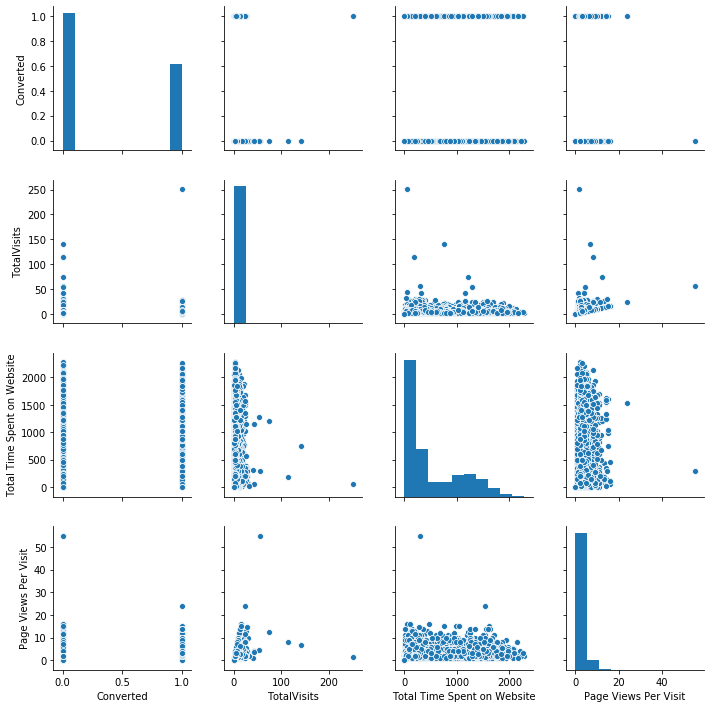

In [713]:
import seaborn as sns
sns.pairplot(df_using)

In [714]:
list1= ['Lead Origin','Lead Source','Last Activity','Specialization',
        'What is your current occupation','Lead Profile','Last Notable Activity']

X = pd.get_dummies(df_using[list1],drop_first = True)



In [715]:
df_using = df_using.drop('How did you hear about X Education',axis=1)
df_using = df_using.drop('Country',axis=1)
df_using = df_using.drop('City',axis=1)

In [716]:
for i in df_using.columns:
    print(df_using[i].value_counts())

2d9a1b63-2cc7-48c4-8ab2-03a96716c2fa    1
6836d63b-3b70-4960-9ee6-825eaaec46f5    1
029effee-3a4a-4723-b11d-69ef1092fe30    1
5df2711c-0bb6-4776-b376-870acf509b63    1
3e8f18de-294c-4765-8ac5-b3035299fb07    1
                                       ..
826b7bdb-46ab-47e9-a875-fc7e2b9f898c    1
6b57ae95-e5ef-49cd-baab-d7ae022c23aa    1
145cf904-e36f-42ac-bf83-0c00433be3f9    1
e1aac2d6-a6c3-4b67-ae6a-818f7a177b46    1
da174428-c274-484c-a369-e3f6ebd48daa    1
Name: Prospect ID, Length: 9240, dtype: int64
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat     

In [717]:
df_using.shape

(9240, 14)

In [718]:
(100*df_using.isnull().sum()/len(df_using.index)).round()

Prospect ID                                0.0
Lead Origin                                0.0
Lead Source                                0.0
Do Not Email                               0.0
Converted                                  0.0
TotalVisits                                1.0
Total Time Spent on Website                0.0
Page Views Per Visit                       1.0
Last Activity                              1.0
Specialization                            16.0
What is your current occupation           29.0
Lead Profile                              29.0
A free copy of Mastering The Interview     0.0
Last Notable Activity                      0.0
dtype: float64

In [719]:
df_using['TotalVisits'] = df_using['TotalVisits'].fillna(df_using['TotalVisits'].median())

In [720]:
(100*df_using.isnull().sum()/len(df_using.index)).round()

Prospect ID                                0.0
Lead Origin                                0.0
Lead Source                                0.0
Do Not Email                               0.0
Converted                                  0.0
TotalVisits                                0.0
Total Time Spent on Website                0.0
Page Views Per Visit                       1.0
Last Activity                              1.0
Specialization                            16.0
What is your current occupation           29.0
Lead Profile                              29.0
A free copy of Mastering The Interview     0.0
Last Notable Activity                      0.0
dtype: float64

In [721]:
df_using['Page Views Per Visit'] = df_using['Page Views Per Visit'].fillna(df_using['Page Views Per Visit'].median())

In [722]:
df_using.shape

(9240, 14)

In [723]:
df_using['Page Views Per Visit'] = df_using['Page Views Per Visit'].fillna('Email Opened')

In [724]:
df_using.shape

(9240, 14)

In [725]:
df_using = df_using.dropna()

In [726]:
df_using.shape

(6394, 14)

In [727]:
df_using.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6394 entries, 0 to 9239
Data columns (total 14 columns):
Prospect ID                               6394 non-null object
Lead Origin                               6394 non-null object
Lead Source                               6394 non-null object
Do Not Email                              6394 non-null object
Converted                                 6394 non-null int64
TotalVisits                               6394 non-null float64
Total Time Spent on Website               6394 non-null int64
Page Views Per Visit                      6394 non-null float64
Last Activity                             6394 non-null object
Specialization                            6394 non-null object
What is your current occupation           6394 non-null object
Lead Profile                              6394 non-null object
A free copy of Mastering The Interview    6394 non-null object
Last Notable Activity                     6394 non-null object
dtypes: flo

In [728]:
list1= ['Lead Origin','Lead Source','Last Activity','Specialization',
        'What is your current occupation','Lead Profile','Last Notable Activity']

In [729]:
dummies = pd.get_dummies(df_using[list1], drop_first= True)

In [730]:
dummies.shape

(6394, 74)

In [731]:
df_using = df_using.drop(list1,axis=1)

In [732]:
df_using = pd.concat([df_using,dummies], axis=1)

In [733]:
df_using.head()

Prospect ID Do Not Email  Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit A free copy of Mastering The Interview  Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  Lead Origin_Lead Import  Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  Lead Source_Live Chat  Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Pay per Click Ads  Lead Source_Press_Release  Lead Source_Reference  Lead Source_Referral Sites  Lead Source_Social Media  Lead Source_WeLearn  Lead Source_Welingak Website  Lead Source_bing  Lead Source_testone  Last Activity_Converted to Lead  Last Activity_Email Bounced  Last Activity_Email Link Clicked  Last Activity_Email Marked Spam  Last Activity_Email Opened  Last Activity_Email Received  Last Activity_Form Submitted on Website  Last Activity_Had a Phone Conversation  Last Activity_Olark Chat Conversation  Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620           No          0          0.0                            0                   0.0                                     No                                    0                          0                        0                           0                     0                   0                      0                       1                           0                              0                          0                      0                           0                         0                    0                             0                 0                    0                                0                            0                                 0                                0                           0                             0                                        0                                       0                                      0                                      1                       0   
1  2a272436-5132-4136-86fa-dcc88c88f482           No          0          5.0                          674                   2.5                                     No                                    0                          0                        0                           0                     0                   0                      0                       0                           1                              0                          0                      0                           0                         0                    0                             0                 0                    0                                0                            0                                 0                                0                           1                             0                                        0                                       0                                      0                                      0                       0   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a           No          1          2.0                         1532                   2.0                                    Yes                                    1                          0                        0                           1                     0                   0                      0                       0                           0                              0                          0                      0                           0                         0                    0                             0                 0                    0                                0                            0                                 0                                0                           1                             0                                        0                                       0                                      0                                      0                       0   
3  0cc2df48-7cf4-4e39-9de9-19797

In [734]:
def email(x):
    if x=='No':
        return 0
    else:
        return 1

df_using['Do Not Email'] = df_using['Do Not Email'].apply(lambda x:email(x))
df_using['A free copy of Mastering The Interview'] = df_using['A free copy of Mastering The Interview'].apply(lambda x:email(x))

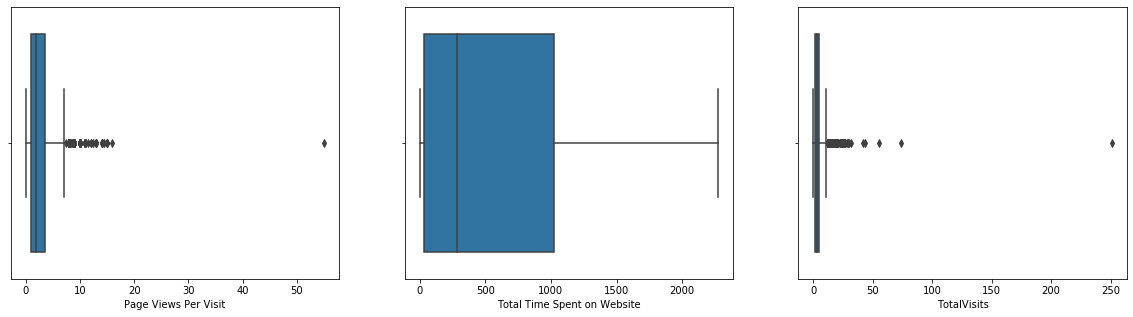

In [735]:
#checking for outliers

list2 = ['Page Views Per Visit','Total Time Spent on Website','TotalVisits']
plt.figure(figsize=(20,5))
for i,col in enumerate(list2):
    plt.subplot(1,3,i+1)
    sns.boxplot(df_using[col])
    

In [736]:
df_using.shape

(6394, 81)

In [737]:
df_using[list2].describe(percentiles = (0.1,0.2,0.25,0.3,0.4,0.5,0.8,0.9,0.95,.99))

Page Views Per Visit  Total Time Spent on Website  TotalVisits
count           6394.000000                  6394.000000  6394.000000
mean               2.477915                   536.450735     3.604629
std                2.162797                   565.674973     4.844048
min                0.000000                     0.000000     0.000000
10%                0.000000                     0.000000     0.000000
20%                0.000000                     0.000000     0.000000
25%                1.000000                    35.000000     1.000000
30%                1.500000                    79.000000     2.000000
40%                2.000000                   176.200000     2.000000
50%                2.000000                   288.000000     3.000000
80%                4.000000                  1152.000000     5.000000
90%                5.000000                  1430.400000     7.700000
95%                6.000000                  1595.000000    10.000000
99%                9.000000                  1850.000000    17.070000
max               55.000000                  2272.000000   251.000000

In [738]:
df_using.head()

Prospect ID  Do Not Email  Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  A free copy of Mastering The Interview  Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  Lead Origin_Lead Import  Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  Lead Source_Live Chat  Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Pay per Click Ads  Lead Source_Press_Release  Lead Source_Reference  Lead Source_Referral Sites  Lead Source_Social Media  Lead Source_WeLearn  Lead Source_Welingak Website  Lead Source_bing  Lead Source_testone  Last Activity_Converted to Lead  Last Activity_Email Bounced  Last Activity_Email Link Clicked  Last Activity_Email Marked Spam  Last Activity_Email Opened  Last Activity_Email Received  Last Activity_Form Submitted on Website  Last Activity_Had a Phone Conversation  Last Activity_Olark Chat Conversation  Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620             0          0          0.0                            0                   0.0                                       0                                    0                          0                        0                           0                     0                   0                      0                       1                           0                              0                          0                      0                           0                         0                    0                             0                 0                    0                                0                            0                                 0                                0                           0                             0                                        0                                       0                                      0                                      1                       0   
1  2a272436-5132-4136-86fa-dcc88c88f482             0          0          5.0                          674                   2.5                                       0                                    0                          0                        0                           0                     0                   0                      0                       0                           1                              0                          0                      0                           0                         0                    0                             0                 0                    0                                0                            0                                 0                                0                           1                             0                                        0                                       0                                      0                                      0                       0   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a             0          1          2.0                         1532                   2.0                                       1                                    1                          0                        0                           1                     0                   0                      0                       0                           0                              0                          0                      0                           0                         0                    0                             0                 0                    0                                0                            0                                 0                                0                           1                             0                                        0                                       0                                      0                                      0                       0   
3  0cc2df48-7cf4-4e39-9d

In [739]:
df_using.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6394 entries, 0 to 9239
Data columns (total 81 columns):
Prospect ID                                             6394 non-null object
Do Not Email                                            6394 non-null int64
Converted                                               6394 non-null int64
TotalVisits                                             6394 non-null float64
Total Time Spent on Website                             6394 non-null int64
Page Views Per Visit                                    6394 non-null float64
A free copy of Mastering The Interview                  6394 non-null int64
Lead Origin_Landing Page Submission                     6394 non-null uint8
Lead Origin_Lead Add Form                               6394 non-null uint8
Lead Origin_Lead Import                                 6394 non-null uint8
Lead Source_Direct Traffic                              6394 non-null uint8
Lead Source_Facebook                                

In [740]:
df_using.corr()

Do Not Email  Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  A free copy of Mastering The Interview  Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  Lead Origin_Lead Import  Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  Lead Source_Live Chat  Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Pay per Click Ads  Lead Source_Press_Release  Lead Source_Reference  Lead Source_Referral Sites  Lead Source_Social Media  Lead Source_WeLearn  Lead Source_Welingak Website  Lead Source_bing  Lead Source_testone  Last Activity_Converted to Lead  Last Activity_Email Bounced  Last Activity_Email Link Clicked  Last Activity_Email Marked Spam  Last Activity_Email Opened  Last Activity_Email Received  Last Activity_Form Submitted on Website  Last Activity_Had a Phone Conversation  Last Activity_Olark Chat Conversation  Last Activity_Page Visited on Website  \
Do Not Email                                            1.000000  -0.145566     0.016417                    -0.051417              0.034574                                0.050862                             0.077613                  -0.021623                -0.009122                    0.084805             -0.009591           -0.059134              -0.004803               -0.036241                    0.029345                      -0.003396                   0.046063              -0.027997                   -0.017815                 -0.004803            -0.003396                      0.009427         -0.005883            -0.003396                        -0.056432                     0.578482                         -0.034667                         0.065149                   -0.207992                     -0.004803                                -0.014164                               -0.008640                              -0.040551                               0.053948   
Converted                                              -0.145566   1.000000     0.009081                     0.314426             -0.063327                               -0.096138                            -0.119268                   0.290657                -0.018532                   -0.134669             -0.020430            0.018672               0.018337               -0.045544                   -0.035012                      -0.012065                  -0.012065               0.245780                   -0.022443                  0.000637             0.012965                      0.144300         -0.006447            -0.012065                        -0.139056                    -0.124859                         -0.033863                         0.018337                   -0.024034                      0.018337                                -0.036503                                0.035569                              -0.164445                              -0.087029   
TotalVisits                                             0.016417   0.009081     1.000000                     0.212253              0.499650                                0.196872                             0.275557                  -0.213682                -0.043505                    0.080847             -0.042590            0.091465              -0.013164               -0.256247                    0.201816                      -0.001561                   0.006185              -0.184489                    0.048682                 -0.004034            -0.004143                     -0.100357         -0.004196             0.003603                        -0.076646                    -0.041767                         -0.013665                         0.001444                    0.015644                      0.006922                                 0.008380                                0.017639                              -0.078138                               0.205542   
Total Time Spent on Website                            -0.051417   0.314426     0.212253            

In [763]:
type(df_using.corr())

pandas.core.frame.DataFrame

In [741]:
import matplotlib.pyplot as plt

plt.figure(figsize = (200,300))
sns.heatmap(df_using.corr(),annot = True)
plt.show()

In [786]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [746]:
y=df_using['Converted']
X=df_using.drop(['Converted','Prospect ID'],axis=1)

In [745]:
df_using.columns

Index(['Prospect ID', 'Do Not Email', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'A free copy of Mastering The Interview', 'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import', 'Lead Source_Direct Traffic', 'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_Olark Chat', 'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release', 'Lead Source_Reference', 'Lead Source_Referral Sites', 'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_Welingak Website', 'Lead Source_bing', 'Lead Source_testone', 'Last Activity_Converted to Lead', 'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam', 'Last Activity_Email Opened', 'Last Activity_Email Received', 'Last Activity_Form Submitted on Website', 'Last Activity_Had a Phone Conversation', 'Last Activity_Olark Chat Conversation',
       'Last Acti

In [747]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [750]:
from sklearn.preprocessing import StandardScaler

In [751]:
scaler=StandardScaler()

In [753]:
X_train[list2] = scaler.fit_transform(X_train[list2])

C:\Users\Rishabh_Goyal\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Rishabh_Goyal\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [761]:
df_using['Converted'].value_counts()

0    3312
1    3082
Name: Converted, dtype: int64

In [762]:
converted_value=100*(sum(y)/len(y.index))
converted_value

48.201438848920866

In [787]:
logreg=LogisticRegression()

In [788]:
# Using RFE 

rfe=RFE(logreg,15)
rfe=rfe.fit(X_train,y_train)

C:\Users\Rishabh_Goyal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rishabh_Goyal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rishabh_Goyal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rishabh_Goyal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rishabh_Goyal\AppData\Local\Continuum\a

C:\Users\Rishabh_Goyal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rishabh_Goyal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rishabh_Goyal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rishabh_Goyal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rishabh_Goyal\AppData\Local\Continuum\a

In [789]:
rfe.support_

array([ True, False,  True, False, False, False,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False,  True,  True,  True, False,
        True, False,  True, False, False, False, False, False,  True,
        True, False, False, False,  True, False, False])

In [790]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 33),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 32),
 ('A free copy of Mastering The Interview', False, 55),
 ('Lead Origin_Landing Page Submission', False, 14),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 58),
 ('Lead Source_Direct Traffic', False, 20),
 ('Lead Source_Facebook', False, 59),
 ('Lead Source_Google', False, 35),
 ('Lead Source_Live Chat', False, 42),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 34),
 ('Lead Source_Pay per Click Ads', False, 40),
 ('Lead Source_Press_Release', False, 61),
 ('Lead Source_Reference', False, 9),
 ('Lead Source_Referral Sites', False, 36),
 ('Lead Source_Social Media', False, 51),
 ('Lead Source_WeLearn', False, 48),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 16),
 ('Lead Source_testone', False, 37),
 ('Last Activity_Converted to Lead', False, 3),
 ('Last Activity_E

In [792]:
col = X_train.columns[rfe.support_]

In [793]:
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat', 'Lead Source_Welingak Website', 'Last Activity_SMS Sent', 'What is your current occupation_Housewife', 'What is your current occupation_Unemployed', 'What is your current occupation_Working Professional', 'Lead Profile_Lateral Student', 'Lead Profile_Potential Lead', 'Lead Profile_Student of SomeSchool', 'Last Notable Activity_Had a Phone Conversation', 'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'], dtype='object')

In [800]:
import statsmodels.api as sm

In [801]:
logm1=sm.GLM(y_train,(sm.add_constant(X_train)),family = sm.families.Binomial())
logm1.fit().summary()

C:\Users\Rishabh_Goyal\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\Rishabh_Goyal\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\Users\Rishabh_Goyal\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:890: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\Users\Rishabh_Goyal\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:889: RuntimeWarning: invalid value encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\Users\Rishabh_Goyal\AppData\Local\Continuum\anaconda3\lib\site-packages\s

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4475
Model:                            GLM   Df Residuals:                     4400
Model Family:                Binomial   Df Model:                           74
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 29 Feb 2020   Deviance:                          nan
Time:                        20:56:14   Pearson chi2:                 4.99e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                -7.725e+14   1.05e+08  -7.35e+06      0.000   -7.72e+14   -7.72e+14
Do Not Email                                         -7.618e+14   5.31e+06  -1.43e+08      0.000   -7.62e+14   -7.62e+14
TotalVisits                                           2.041e+14   1.42e+06   1.44e+08      0.000    2.04e+14    2.04e+14
Total Time Spent on Website                           2.565e+14   1.16e+06   2.21e+08      0.000    2.57e+14    2.57e+14
Page Views Per Visit                                 -7.322e+13   1.52e+06  -4.81e+07      0.000   -7.32e+13   -7.32e+13
A free copy of Mastering The Interview                8.241e+13   3.07e+06   2.69e+07      0.000    8.24e+13    8.24e+13
Lead Origin_Landing Page Submission                   -1.88e+14    3.8e+06  -4.94e+07      0.000   -1.88e+14   -1.88e+14
Lead Origin_Lead Add Form                             3.658e+15   4.83e+07   7.57e+07      0.000    3.66e+15    3.66e+15
Lead Origin_Lead Import                               1.765e+15   3.47e+07   5.09e+07      0.000    1.76e+15    1.76e+15
Lead Source_Direct Traffic                            2.958e+15    6.8e+07   4.35e+07      0.000    2.96e+15    2.96e+15
Lead Source_Facebook                                  1.765e+15   3.47e+07   5.09e+07      0.000    1.76e+15    1.76e+15
Lead Source_Google                                    3.014e+15   6.79e+07   4.44e+07      0.000    3.01e+15    3.01e+15
Lead Source_Live Chat                                 3.551e+15   8.23e+07   4.31e+07      0.000    3.55e+15    3.55e+15
Lead Source_Olark Chat                                3.241e+15   6.78e+07   4.78e+07      0.000    3.24e+15    3.24e+15
Lead Source_Organic Search                            3.048e+15    6.8e+07   4.48e+07      0.000    3.05e+15    3.05e+15
Lead Source_Pay per Click Ads                        -5.231e+14   9.56e+07  -5.47e+06      0.000   -5.23e+14   -5.23e+14
Lead Source_Press_Release                             9.116e+14   9.63e+07   9.47e+06      0.000    9.12e+14    9.12e+14
Lead Source_Reference                                 6.983e+14   4.77e+07   1.46e+07      0.000    6.98e+14    6.98e+14
Lead Source_Referral Sites                            2.884e+15   6.86e+07   4.21e+07      0.000    2.88e+15    2.88e+15
Lead Source_Social Media                             -2.758e+14    9.6e+07  -2.87e+06      0.000   -2.76e+14   -2.76e+14
Lead Source_WeLearn                                   7.747e+15   9.56e+07   8.11e+07      0.000    7.75e+15    7.75e+15
Lead Source_Welingak Website                          7.341e+14   4.82e+07   1.52e+07      0.000    7.34e+14    7.34e+14
Lead Source_bing                                      3.68

In [802]:
logreg=LogisticRegression()